# Quantum Key Distribution : A Simple BB84 Protocol Simulation

#### As demand for ICS-560 Course Project
<br>

| Course Name | Studnet ID | Student Name | Univeristy |
| :-: | :-: | :-: | :-: |
| ICS-560 - Fundamentals of quantum computing | G202418600 | Shouq L. Al-anazi | King Fahd University for Petrulume and Minerals (KFUPM)  |


<br>

-----

## Libraries installation

Import the required libraries

In [53]:
from qiskit import QuantumCircuit, transpile
import qiskit_aer 
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
%matplotlib inline

### Encryption using Quantum Cryptography


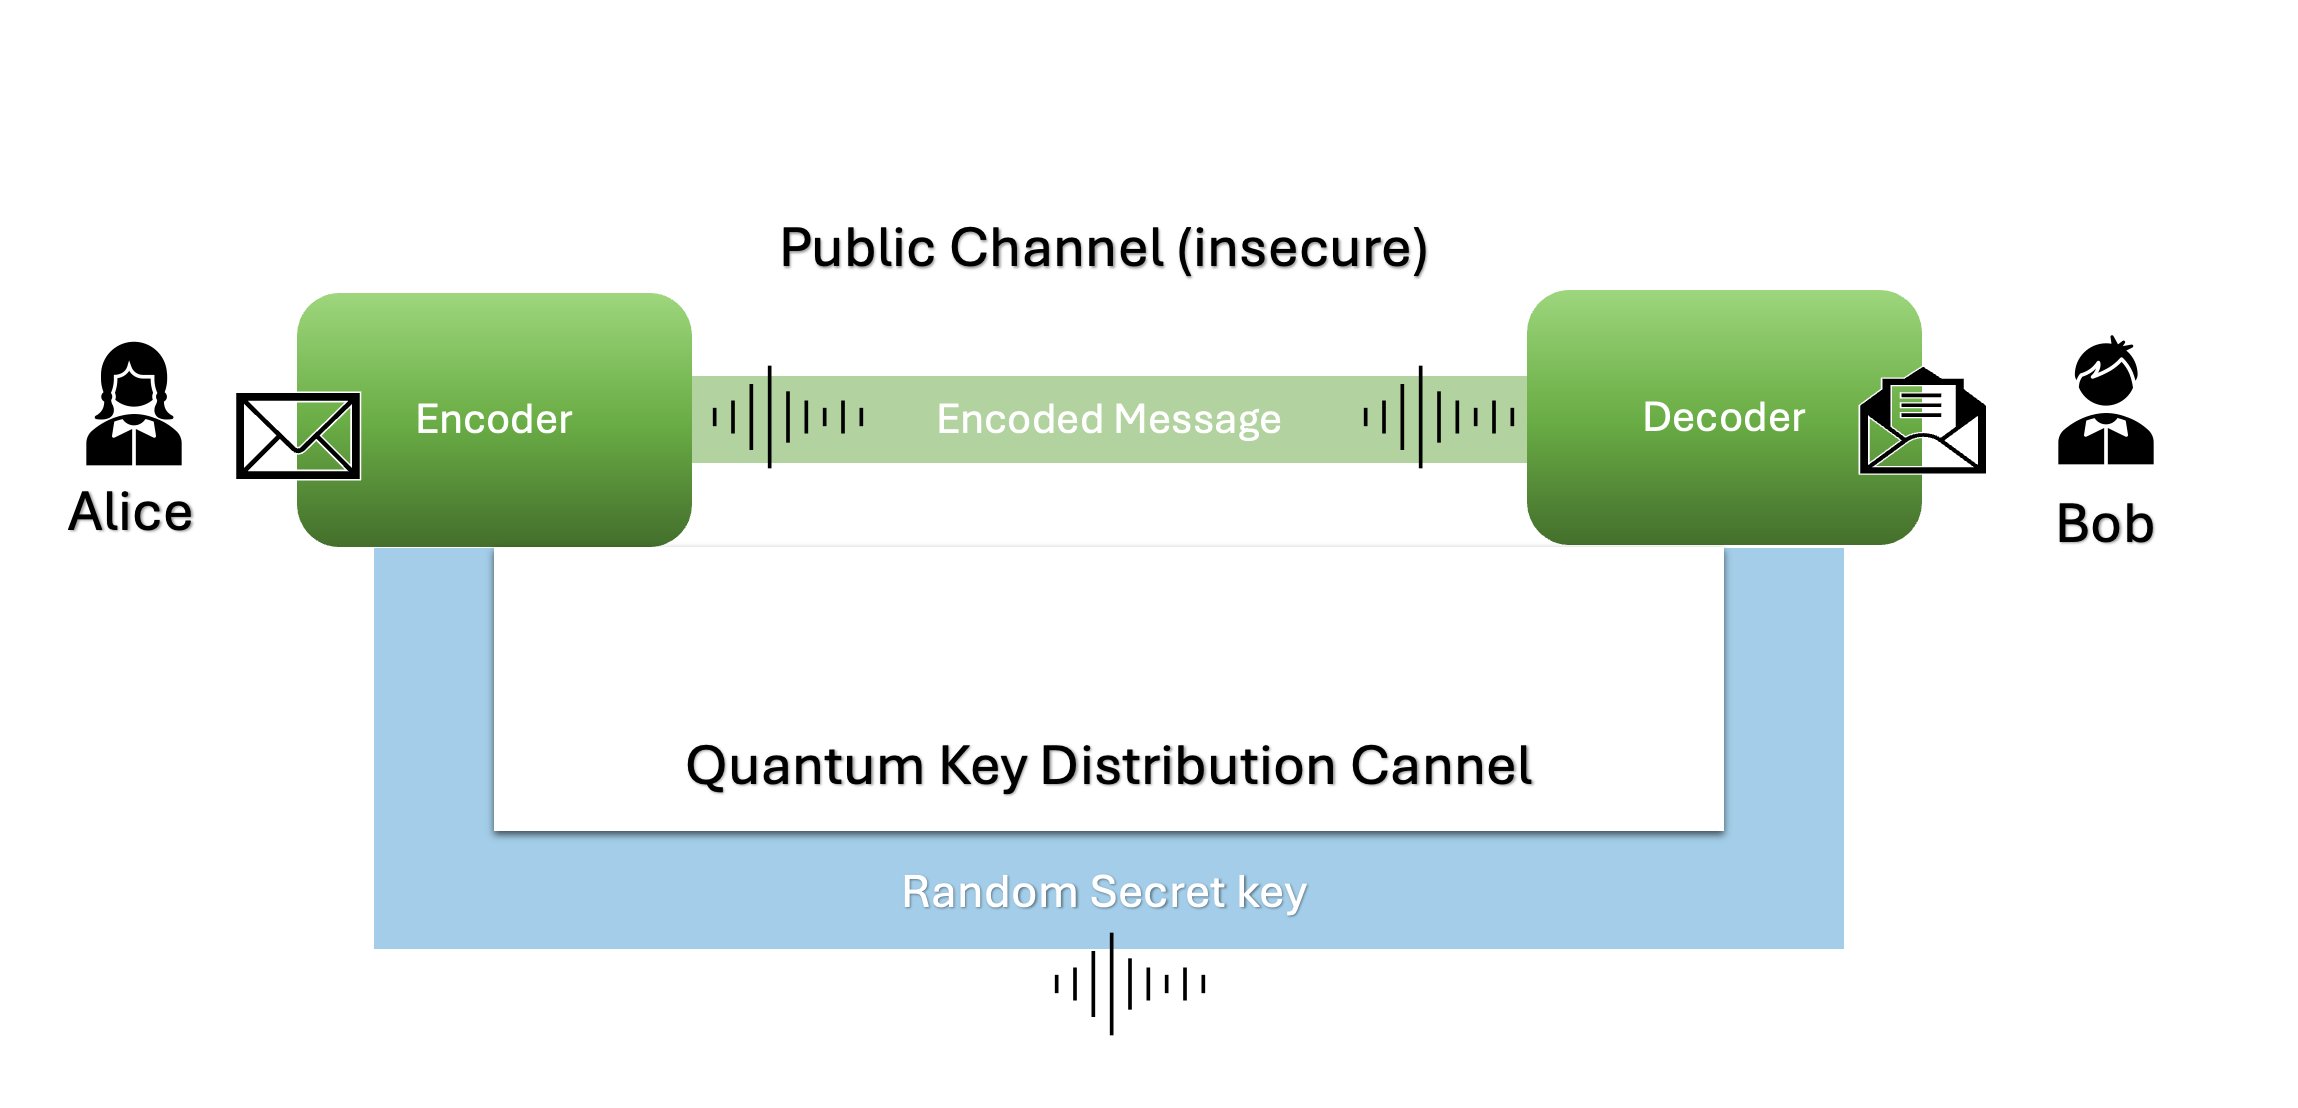
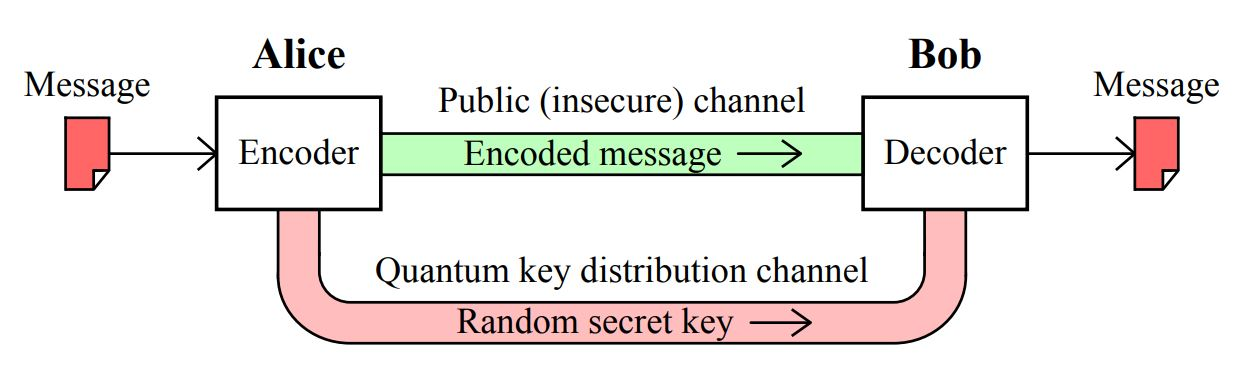

### Step 1: Random Binary Sequence String Generation

##### Summary :
Alice (Sender) will generate two strings(of 0s and 1s). 
One string to encode the basis for each qubit and 2nd string to encode its state.

- Computational basis will be represented by : 0 
- Hadamard basis will be represented by : 1

 ##### Simulation parameters:
- Alice generates a 8 bit string. 
- The number of qubits needed is 8.
- We will generate 2 random strings ( 8*2 = 16 bits total ) --> which  represent Alice's state and the encoding basis for the state.
(the 2nd basis string for encoding the state is important for Bob's to decrypt the message using the key)


---

Alice_B : Alice's Basis. <br>
Alice_S : Alice's States.<br>
Bob_B : Bob's Basis.<br>

In [74]:
N_qubit = 8 # Number of the needed qubits in this simulation

def Alice_B(N_qubit):
    Alice_B = np.random.randint(2, size=N_qubit)
    print(f"\nAlice's Bases:\t {np.array2string(Alice_B)}")
    return Alice_B

def Alice_S(N_qubit):
    Alice_S = np.random.randint(2, size=N_qubit)
    print(f"Alice's State:\t {np.array2string(Alice_S)}")
    return Alice_S

def Bob_B(N_qubit):
    Bob_B = np.random.randint(2, size=N_qubit)
    print(f"\nBob's Bases:\t {np.array2string(Bob_B)}\n")
    return Bob_B

##### Explaination:
- When Alice's State is ( 1 ) and her basis is ( 0 ) --> this means Alice is using Computational basis to encode the state ( 1 ).
- When Alice's state is ( 1 ) and her basis is ( 1 ) --> this means Alice is using Hadamard Gate (H) to encode the state ( 1 ) which results in $|-\rangle$

### Step 2: BB84 protocol Circuit creation

We will use this algorithm to construct the circuit

1. Whenever Alice wants to encode 1 in a qubit, she applies an X gate to the qubit. To encode 0, no action is needed as the qubits in qiskit are by default initialized to state 0 and applying an X gate is the equivalent of applying NOT.


2. Wherever she wants to encode it in the Hadamard basis, she applies an hadamard gate. No action is necessary to encode a qubit in the computational basis as the default basis in qiskit is the computational basis


3. She then *sends* the qubits to Bob


4. Bob measures the qubits according to his binary string. To measure a qubit in the Hadamard basis, he applies an hadamard gate to the corresponding qubit and then performs a measurement on the computational basis.

In [77]:
def bb84_circuit(state, basis, measurement_basis):  
  #  N_qubit = len(state)   
    circuit = QuantumCircuit(N_qubit)

    # Alice's qubits preparations 
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   
    # Bob's measurements on qubits
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)
       
    circuit.measure_all()
    return circuit

## Step 3: Keys Generation

Alice and Bob only keep the bits in the strings where the bases match. For example, in the example above only if Alice's encoding basis is 0 and Bob's measuring basis is 0 or its 1 and 1 the bits are kept

The probability that their bases match is $\frac{1}{2}$ as the probability that Alice chooses computational basis is $\frac{1}{2}$ and probability that Bob chooses computational basis is $\frac{1}{2}$ so the probability that both choose computational basis is 1/4 or the probability that both choose hadamard basis is ($\frac{1}{2}$*$\frac{1}{2}$) so in total the probability that both their bases match is $\frac{1}{2}$

Here are all the possibilities for the BB84 protocol

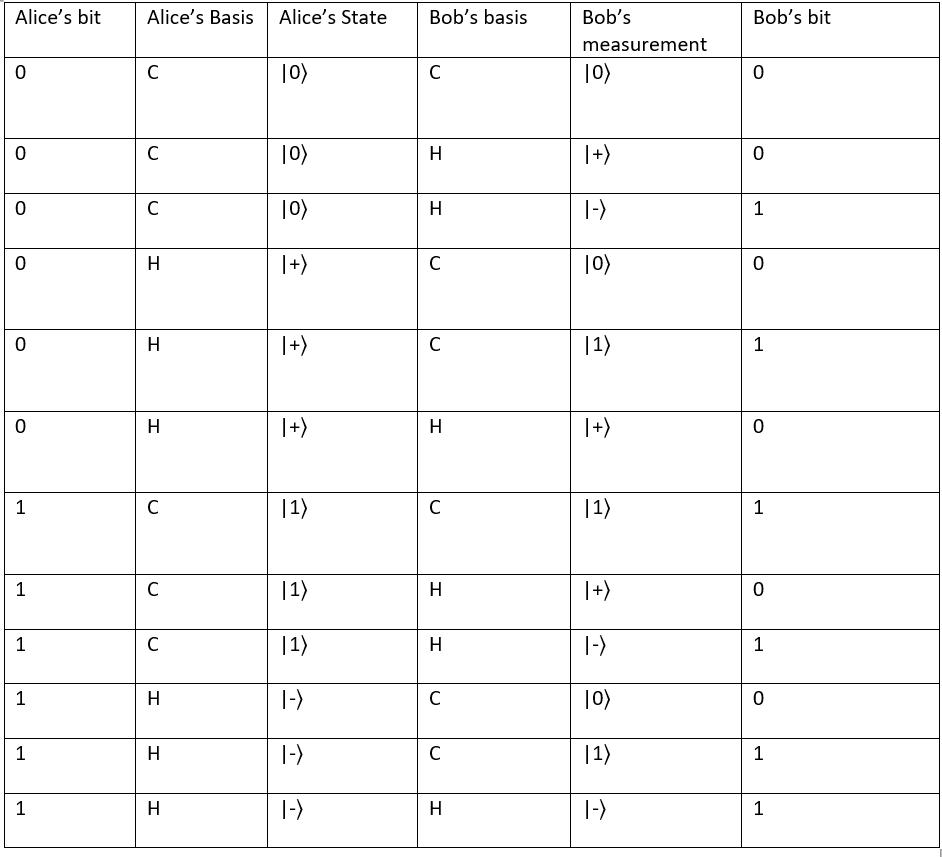

### Step 4: Executing the circuit

We will keep the bits that match so when Alice_B[i] == Bob_B[i]

In [108]:
def Alice_B(N_qubit):
    Alice_B = np.random.randint(2, size=N_qubit)
    print(f"\nAlice's Bases:\t {np.array2string(Alice_B)}")
    return Alice_B

def Alice_S(N_qubit):
    Alice_S = np.random.randint(2, size=N_qubit)
    print(f"Alice's State:\t {np.array2string(Alice_S)}")
    return Alice_S

def Bob_B(N_qubit):
    Bob_B = np.random.randint(2, size=N_qubit)
    print(f"\nBob's Bases:\t {np.array2string(Bob_B)}\n")
    return Bob_B

def bb84_circuit(state, basis, measurement_basis):  
  #  N_qubit = len(state)   
    circuit = QuantumCircuit(N_qubit)

    # Alice's qubits preparations 
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   
    # Bob's measurements on qubits
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)
       
    circuit.measure_all()
    return circuit


### STEP 1 -  Random Binary Sequence String Generation
# Call the functions that generates the Basis and States for the Communciation procedure.

N_qubit = 8 
#Since the Number of the needed qubits in this simulation from the initial assumption is that our qubits size = 8 

Alice_B = Alice_B(N_qubit)
Alice_S = Alice_S(N_qubit)
Bob_B = Bob_B(N_qubit)

### STEP 2 -  BB84 protocol Circuit Creation
circuit = bb84_circuit(Alice_S, Alice_B , Bob_B)

# Configure the AerSimulator with more qubits

backend = AerSimulator(method="automatic") 



# Transpile the circuit for the simulator
transpiled_circuit = transpile(circuit.reverse_bits(), backend=backend)

# Circuit Execution
result = backend.run(transpiled_circuit).result()

# Getting Results
counts = result.get_counts()

key = list(counts.keys())[0]

### STEP 3 - Key Generation

# Key Generation upon matched Basis the encryption key based on matching bases
encryption_key = ''
for i in range(len(Alice_B)):
    if Alice_B[i] == Bob_B[i]:
        encryption_key += key[i]

print(f"Key: {encryption_key}")


Alice's Bases:	 [0 1 1 0 1 1 0 1]
Alice's State:	 [0 0 0 0 0 1 1 1]

Bob's Bases:	 [1 1 1 0 1 1 1 1]

Key: 000011


## Conclusion

#### The presented Key is to be used by Bob in order to Dycript Alice's message.
##### and now they can communicate <b> securly <b>.

| |
| :-: |
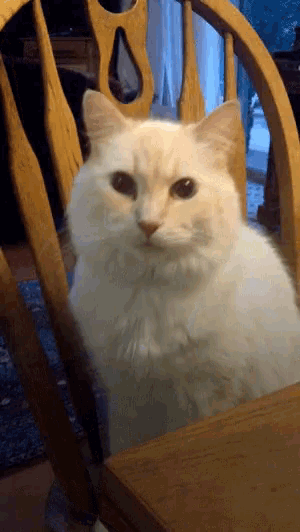